In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
path = '../data/processed/merged_data_2.csv'
df = pd.read_csv(path)

/home/djordje/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [41]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=2):
    plt.figure(figsize=(16,10))
    plt.scatter(df.LONGITUDE, df.LATITUDE, zorder=1, alpha=alpha, c='r', s=s)
    plt.xlim((BB[0], BB[1]))
    plt.ylim((BB[2], BB[3]))
    plt.imshow(nyc_map, zorder=0, extent=BB)

In [42]:
nyc_map = plt.imread('../docs/media/NYC.png')

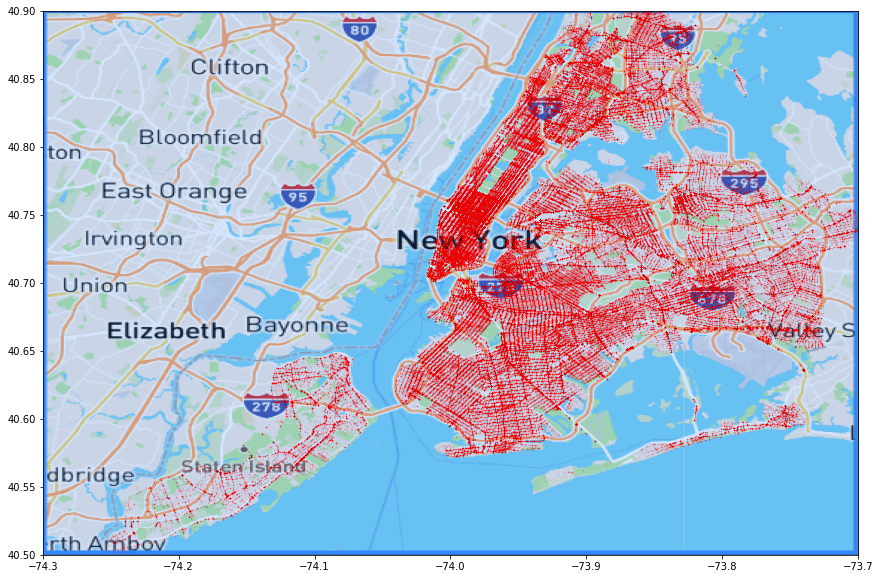

In [54]:
plot_on_map(df, [-74.3,-73.7, 40.5, 40.9], nyc_map, s=0.1, alpha=0.1)

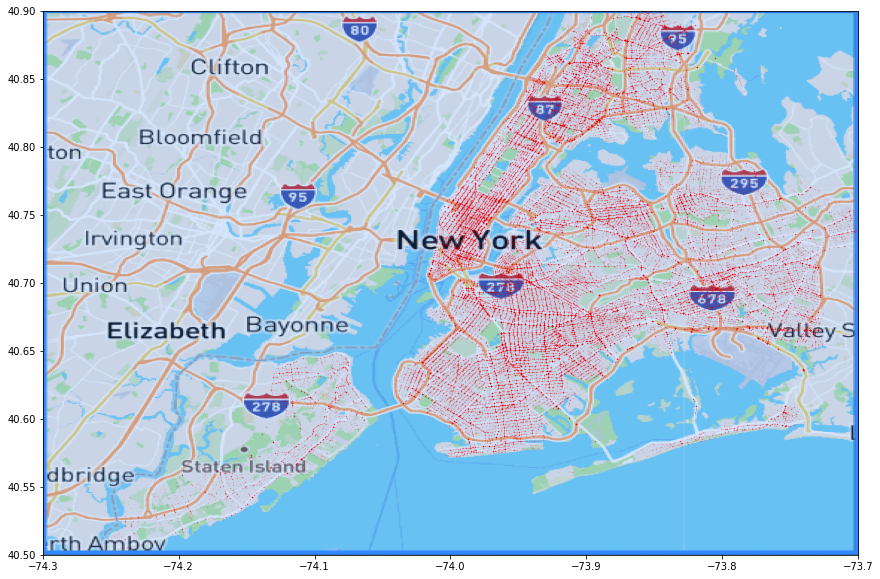

In [53]:
plot_on_map(df[df['SEVERITY'] == 1], [-74.3,-73.7, 40.5, 40.9], nyc_map, s=0.1, alpha=0.1)

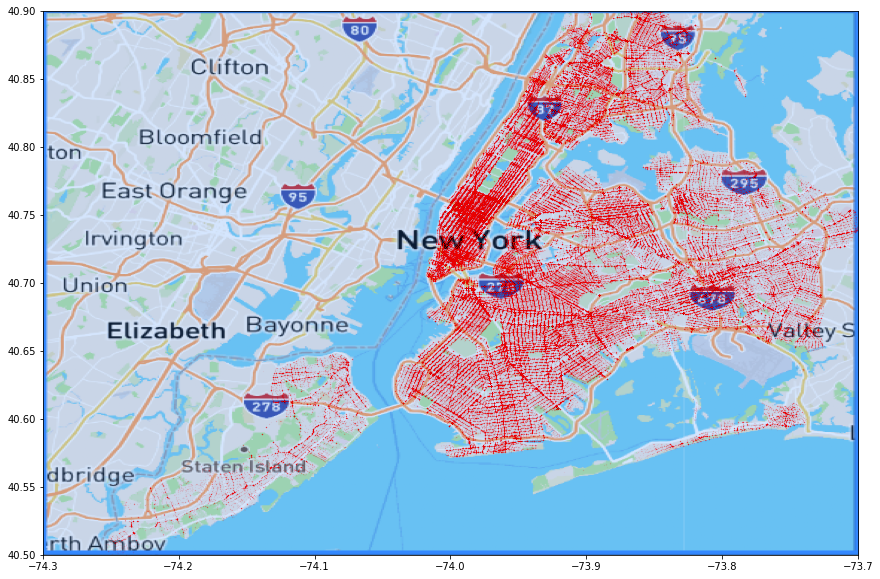

In [73]:
plot_on_map(df[(df['POSTED_SPEED'] <= 25) & (df['POSTED_SPEED'] != 0)] , [-74.3,-73.7, 40.5, 40.9], nyc_map, s=0.05, alpha=0.1)

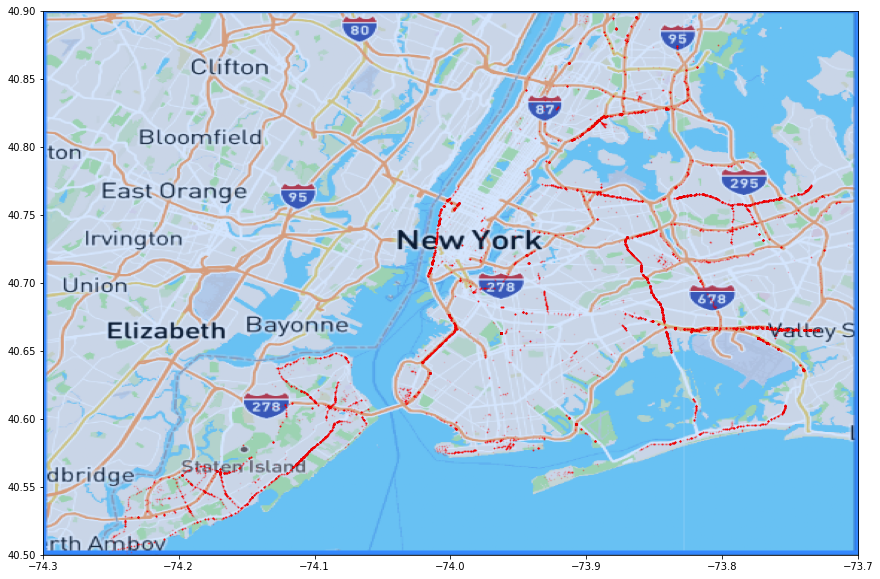

In [65]:
plot_on_map(df[(df['POSTED_SPEED'] > 25) | (df['POSTED_SPEED'] == 0)] , [-74.3,-73.7, 40.5, 40.9], nyc_map, s=0.5, alpha=0.1)

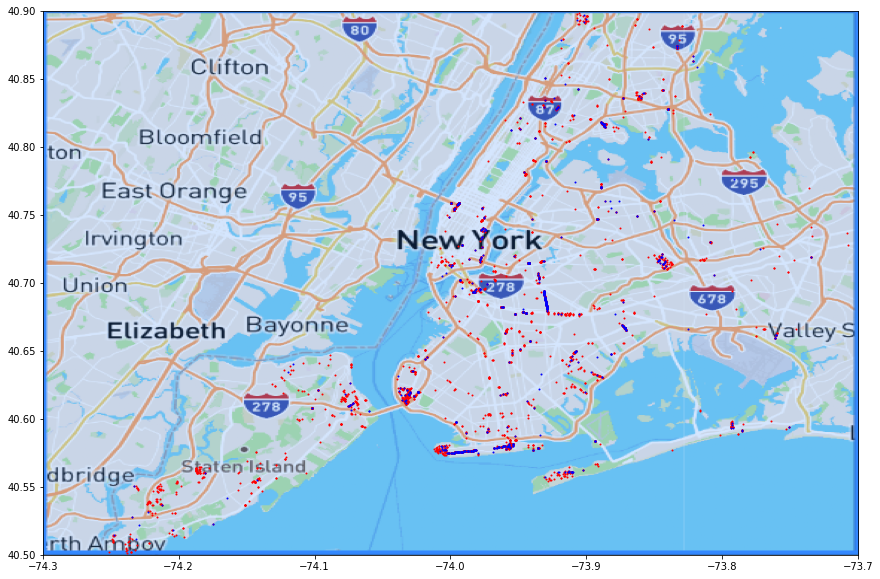

In [48]:
df2 = df[df['POSTED_SPEED'] == 0]
df_2_0 = df2[df2['SEVERITY'] == 0]
df_2_1 = df2[df2['SEVERITY'] == 1]
BB = [-74.3,-73.7, 40.5, 40.9]

plt.figure(figsize=(16,10))
plt.scatter(df_2_0.LONGITUDE, df_2_0.LATITUDE, zorder=1, alpha=1, c='r', s=1)
plt.scatter(df_2_1.LONGITUDE, df_2_1.LATITUDE, zorder=1, alpha=1, c='b', s=1)
plt.xlim((BB[0], BB[1]))
plt.ylim((BB[2], BB[3]))
plt.imshow(nyc_map, zorder=0, extent=BB)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727335 entries, 0 to 727334
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CRASH DATE           727335 non-null  object 
 1   CRASH TIME           727335 non-null  object 
 2   BOROUGH              727335 non-null  object 
 3   ZIP CODE             727335 non-null  object 
 4   LATITUDE             727335 non-null  float64
 5   LONGITUDE            727335 non-null  float64
 6   ON STREET NAME       727335 non-null  object 
 7   HOUR                 727335 non-null  int64  
 8   Temperature          727335 non-null  int64  
 9   FeelsLike            727335 non-null  float64
 10  Dew                  727335 non-null  float64
 11  Humidity             727335 non-null  int64  
 12  Wind                 727335 non-null  object 
 13  WindSpeed            727335 non-null  float64
 14  Pressure             727335 non-null  float64
 15  Precip.          

In [10]:
df.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  2019-11-24      20:00  MANHATTAN    10006  40.70983  -74.01468   
1  2019-09-30      18:00  MANHATTAN    10006  40.70983  -74.01468   
2  2019-09-03      21:06  MANHATTAN    10006  40.70983  -74.01468   
3  2019-09-14      18:00  MANHATTAN    10006  40.70983  -74.01468   
4  2018-04-19       8:59  MANHATTAN    10006  40.70983  -74.01468   

  ON STREET NAME  HOUR  Temperature  FeelsLike  ...   XFrom   YFrom     XTo  \
0    WEST STREET    20           43       35.0  ...  980163  197889  980205   
1    WEST STREET    18           67       67.0  ...  980163  197889  980205   
2    WEST STREET    21           74       74.0  ...  980163  197889  980205   
3    WEST STREET    18           74       74.0  ...  980163  197889  980205   
4    WEST STREET     8           46       40.0  ...  980163  197889  980205   

      YTo  POSTED_SPEED  Snow_Priority Number_Travel_Lanes Number_Park_Lanes  \
0  198078            30              C                   2                 0   
1  198078            30              C                   2                 0   
2  198078            30              C                   2                 0   
3  198078            30              C                   2                 0   
4  198078            30              C                   2                 0   

  Number_Total_Lanes  TRUCK_ROUTE_TYPE  
0                  2               3.0  
1                  2               3.0  
2                  2               3.0  
3                  2               3.0  
4                  2               3.0  

[5 rows x 33 columns]

In [11]:
def bar_plot_column(df, name):
    plt.figure(figsize = (8,10))
    sns.countplot(y=name, data=df, order=df[name].value_counts().index)
    plt.title('Count of ' + name)
    plt.ylabel(name)
    plt.xlabel('Count')
    plt.show()

In [12]:
def inspect_potential_causality(df, treatment):
    print(df[treatment][df['SEVERITY'] == 0].describe(), df[treatment][df['SEVERITY'] == 1].describe())
    print('\n')
    print(df[treatment][df['SEVERITY'] == 0].value_counts(), df[treatment][df['SEVERITY'] == 1].value_counts())
    print('\n')
    bar_plot_column(df[df['SEVERITY'] == 0], treatment)
    bar_plot_column(df[df['SEVERITY'] == 1], treatment)

# POSTED SPEED POTENTIAL CAUSALITY EDA

count    590801.000000
mean         25.097055
std           2.812926
min           0.000000
25%          25.000000
50%          25.000000
75%          25.000000
max          50.000000
Name: POSTED_SPEED, dtype: float64 count    135871.000000
mean         25.171781
std           2.779315
min           0.000000
25%          25.000000
50%          25.000000
75%          25.000000
max          50.000000
Name: POSTED_SPEED, dtype: float64


25    544641
30     21941
20     12567
35      5378
0       3631
40      1358
50      1011
45       152
15       122
Name: POSTED_SPEED, dtype: int64 25    125524
30      4855
20      2613
35      1397
0        670
40       449
50       303
45        40
15        20
Name: POSTED_SPEED, dtype: int64




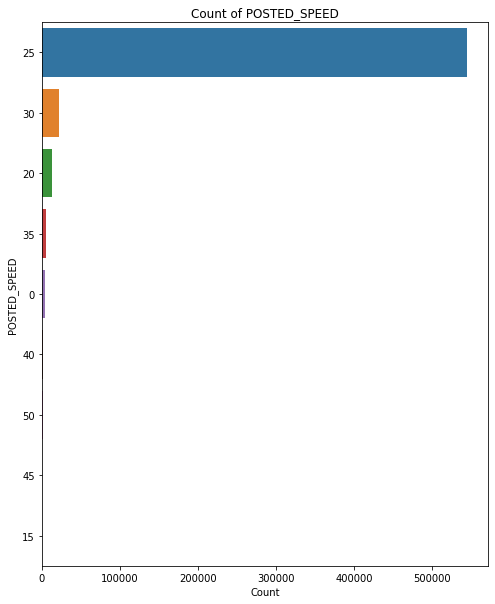

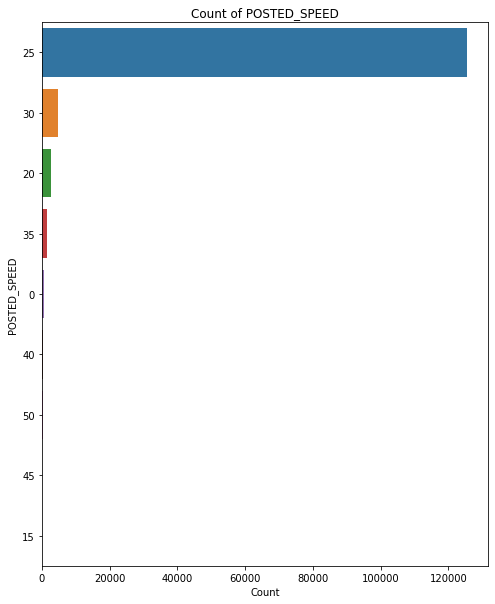

In [13]:
inspect_potential_causality(df, 'POSTED_SPEED')

# NUM TRAVEL LANES POTENTIAL CAUSALITY EDA

count    590801.000000
mean          2.192921
std           1.215892
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           8.000000
Name: Number_Travel_Lanes, dtype: float64 count    135871.000000
mean          2.312436
std           1.181653
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           8.000000
Name: Number_Travel_Lanes, dtype: float64


2    214244
1    208075
4    118081
3     36165
5      7375
6      6512
7       301
0        30
8        18
Name: Number_Travel_Lanes, dtype: int64 2    58782
1    36092
4    29665
3     8216
6     1593
5     1463
7       44
0       10
8        6
Name: Number_Travel_Lanes, dtype: int64




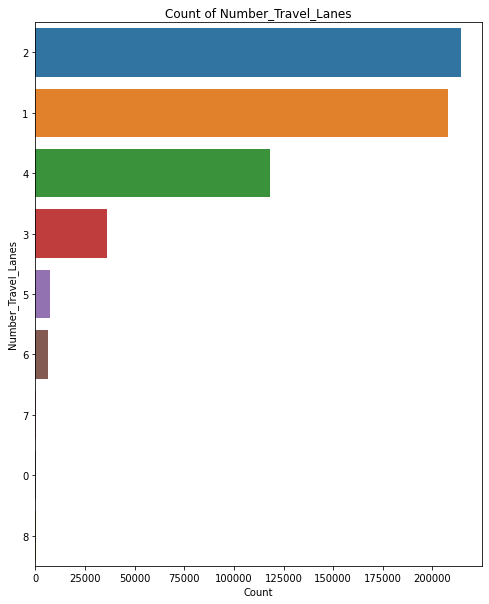

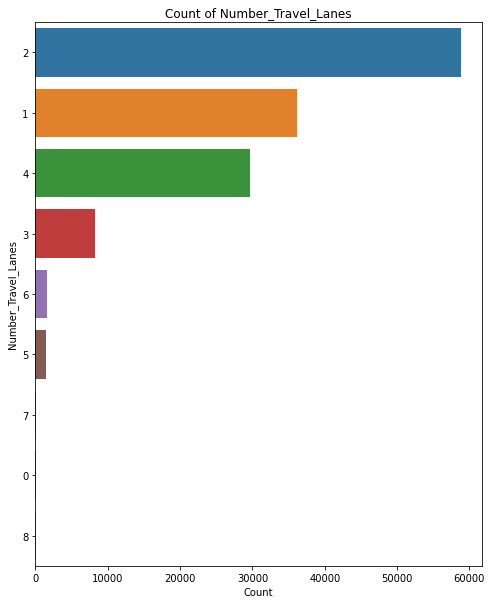

In [14]:
inspect_potential_causality(df, 'Number_Travel_Lanes')

count    590801.000000
mean          1.615781
std           0.714584
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: Number_Park_Lanes, dtype: float64 count    135871.000000
mean          1.590177
std           0.735062
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: Number_Park_Lanes, dtype: float64


2    444532
0     80839
1     65393
4        37
Name: Number_Park_Lanes, dtype: int64 2    100403
0     20245
1     15213
4        10
Name: Number_Park_Lanes, dtype: int64




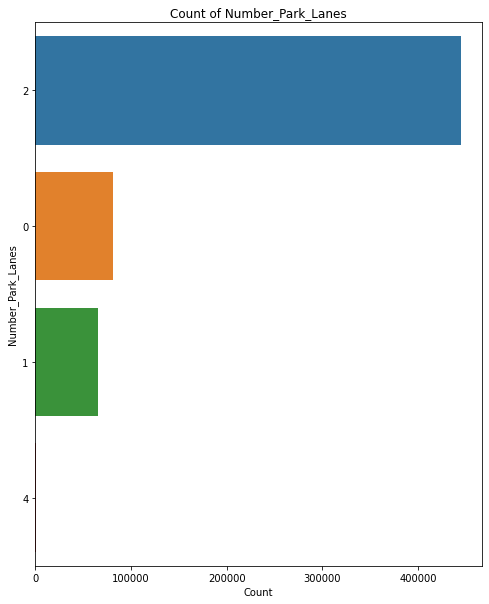

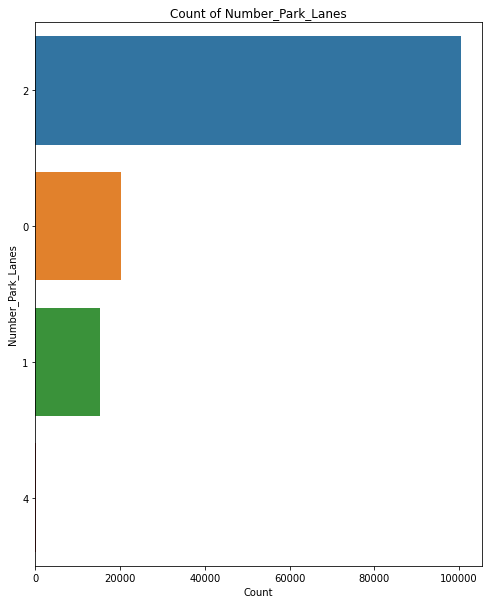

In [15]:
inspect_potential_causality(df, 'Number_Park_Lanes')

count    444532.000000
mean         24.832869
std           1.890862
min           0.000000
25%          25.000000
50%          25.000000
75%          25.000000
max          45.000000
Name: POSTED_SPEED, dtype: float64 count    100403.000000
mean         24.873311
std           1.696706
min           0.000000
25%          25.000000
50%          25.000000
75%          25.000000
max          40.000000
Name: POSTED_SPEED, dtype: float64


25    425956
20     11601
30      4857
0       1799
40       234
35        63
45        16
15         6
Name: POSTED_SPEED, dtype: int64 25    96545
20     2393
30     1073
0       297
40       71
35       24
Name: POSTED_SPEED, dtype: int64




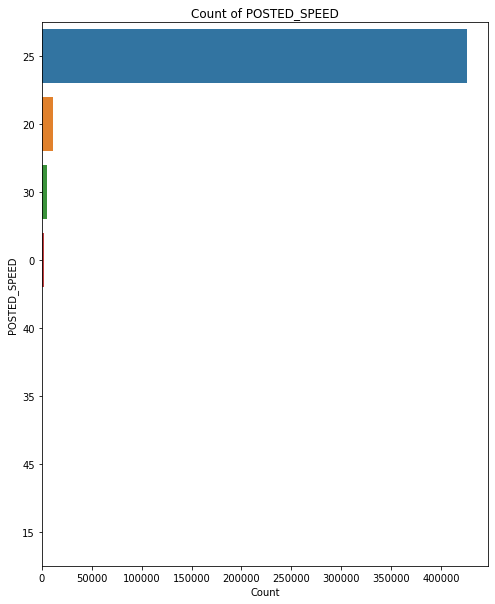

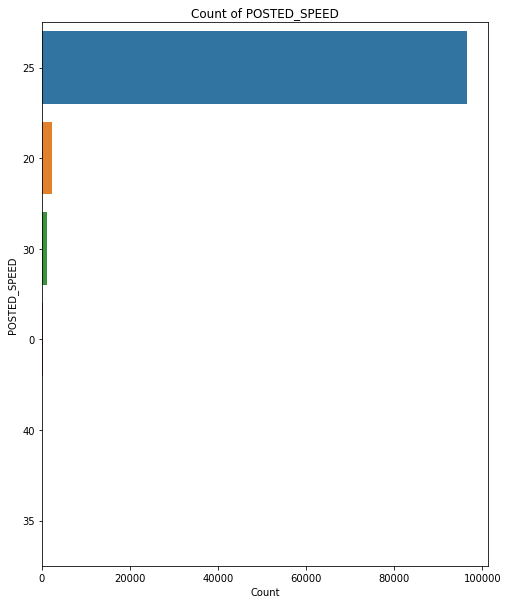

In [16]:
inspect_potential_causality(df[df['Number_Park_Lanes'] == 2], 'POSTED_SPEED')

count    118081.000000
mean         25.407136
std           2.601272
min           0.000000
25%          25.000000
50%          25.000000
75%          25.000000
max          50.000000
Name: POSTED_SPEED, dtype: float64 count    29665.000000
mean        25.442272
std          2.411440
min          0.000000
25%         25.000000
50%         25.000000
75%         25.000000
max         50.000000
Name: POSTED_SPEED, dtype: float64


25    108651
30      5655
35      2737
0        471
20       256
40       228
50        81
45         2
Name: POSTED_SPEED, dtype: int64 25    27385
30     1277
35      740
20      106
40       71
0        67
50       19
Name: POSTED_SPEED, dtype: int64




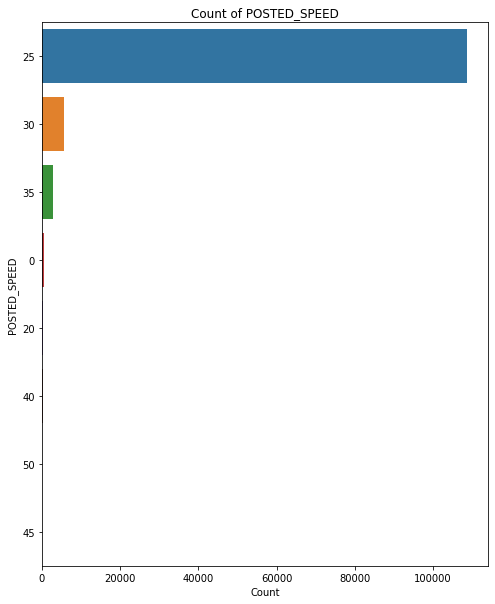

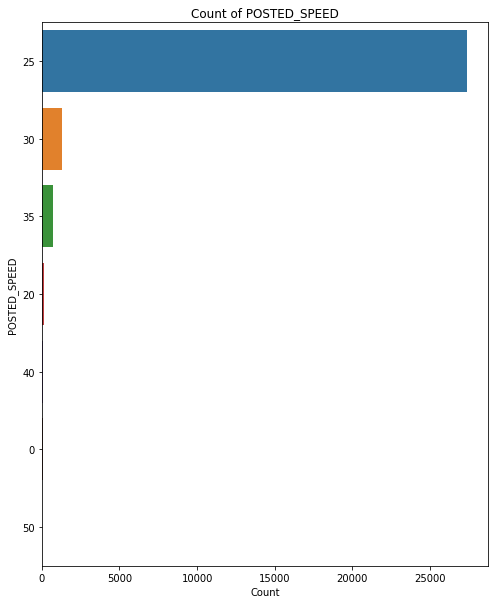

In [17]:
inspect_potential_causality(df[df['Number_Travel_Lanes'] == 4], 'POSTED_SPEED')

# EXAMINE CAUSALITY

In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [19]:
path = '../data/processed/merged_data_2.csv'
df = pd.read_csv(path, dtype={"ZIP CODE": str})

In [20]:
df.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  2019-11-24      20:00  MANHATTAN  10006.0  40.70983  -74.01468   
1  2019-09-30      18:00  MANHATTAN  10006.0  40.70983  -74.01468   
2  2019-09-03      21:06  MANHATTAN  10006.0  40.70983  -74.01468   
3  2019-09-14      18:00  MANHATTAN  10006.0  40.70983  -74.01468   
4  2018-04-19       8:59  MANHATTAN  10006.0  40.70983  -74.01468   

  ON STREET NAME  HOUR  Temperature  FeelsLike  ...   XFrom   YFrom     XTo  \
0    WEST STREET    20           43       35.0  ...  980163  197889  980205   
1    WEST STREET    18           67       67.0  ...  980163  197889  980205   
2    WEST STREET    21           74       74.0  ...  980163  197889  980205   
3    WEST STREET    18           74       74.0  ...  980163  197889  980205   
4    WEST STREET     8           46       40.0  ...  980163  197889  980205   

      YTo  POSTED_SPEED  Snow_Priority Number_Travel_Lanes Number_Park_Lanes  \
0  198078            30              C                   2                 0   
1  198078            30              C                   2                 0   
2  198078            30              C                   2                 0   
3  198078            30              C                   2                 0   
4  198078            30              C                   2                 0   

  Number_Total_Lanes  TRUCK_ROUTE_TYPE  
0                  2               3.0  
1                  2               3.0  
2                  2               3.0  
3                  2               3.0  
4                  2               3.0  

[5 rows x 33 columns]

In [21]:
df['YEAR'] = (df['CRASH DATE'].apply(lambda x: x.split('-')[0])).astype(int)
df['MONTH'] = (df['CRASH DATE'].apply(lambda x: x.split('-')[1])).astype(int)
df['DOW'] = (df['CRASH DATE'].apply(lambda x: pd.Timestamp(x).dayofweek)).astype(int)
df['HOUR'] = df['CRASH TIME'].apply(lambda x: x.split(':')[0]).astype(int)


df = df.drop(columns=['CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'geometry',
                      'TRUCK_ROUTE_TYPE', 'XFrom', 'YFrom', 'XTo', 'YTo',
                      'ON STREET NAME', 'NonPed'])

df['SEVERITY'] = df['SEVERITY'].replace(2, 1)
df['SEVERITY'].value_counts()

0    590801
1    136534
Name: SEVERITY, dtype: int64

In [22]:
df.isna().sum()

BOROUGH                  0
LATITUDE                 0
LONGITUDE                0
HOUR                     0
Temperature              0
FeelsLike                0
Dew                      0
Humidity                 0
Wind                     0
WindSpeed                0
Pressure                 0
Precip.                  0
Condition                0
Day/Night                0
Clouds                   0
SEVERITY                 0
StreetWidth_Min          0
POSTED_SPEED             0
Snow_Priority          772
Number_Travel_Lanes      0
Number_Park_Lanes        0
Number_Total_Lanes       0
YEAR                     0
MONTH                    0
DOW                      0
dtype: int64

In [23]:
df = df.dropna()
df['SEVERITY'].value_counts()

0    590164
1    136399
Name: SEVERITY, dtype: int64

In [24]:
df.columns

Index(['BOROUGH', 'LATITUDE', 'LONGITUDE', 'HOUR', 'Temperature', 'FeelsLike',
       'Dew', 'Humidity', 'Wind', 'WindSpeed', 'Pressure', 'Precip.',
       'Condition', 'Day/Night', 'Clouds', 'SEVERITY', 'StreetWidth_Min',
       'POSTED_SPEED', 'Snow_Priority', 'Number_Travel_Lanes',
       'Number_Park_Lanes', 'Number_Total_Lanes', 'YEAR', 'MONTH', 'DOW'],
      dtype='object')

In [25]:
df['POSTED_SPEED'].value_counts()

25    670360
30     26832
20     15186
35      6787
0       3932
40      1817
50      1315
45       192
15       142
Name: POSTED_SPEED, dtype: int64

## Treatment - POSTED_SPEED

In [26]:
df['POSTED_SPEED'].values[df['POSTED_SPEED'] > 25] = 0
df['POSTED_SPEED'].values[df['POSTED_SPEED'] != 0] = 1

In [27]:
df['POSTED_SPEED'].value_counts()

1    685688
0     40875
Name: POSTED_SPEED, dtype: int64

In [28]:
df_experiment = df.sample(n=300000)
df_experiment = df_experiment.reset_index(drop=True)

In [29]:
print(df_experiment['SEVERITY'].unique())

le = LabelEncoder()
y = pd.Series(le.fit_transform(df_experiment['SEVERITY']))
y.mean()

[0 1]


0.18796333333333334

18.8% of incidents report injury or death

In [30]:
print(df['POSTED_SPEED'].unique())
a = pd.Series(le.fit_transform(df_experiment['POSTED_SPEED']))
a.mean()

[0 1]


0.94461

94% of incidents belong to treatment class

In [31]:
confounders = ['LATITUDE', 'LONGITUDE', 'HOUR', 'Temperature', 'FeelsLike',
               'Dew', 'Humidity', 'WindSpeed', 'Precip.',
               'Condition', 'Day/Night', 'Clouds', 'StreetWidth_Min',
               'Snow_Priority', 'Number_Travel_Lanes',
               'Number_Park_Lanes', 'Number_Total_Lanes', 'YEAR', 'MONTH', 'DOW'
              ]

In [32]:
X = df_experiment[confounders]
X.dtypes

LATITUDE               float64
LONGITUDE              float64
HOUR                     int64
Temperature              int64
FeelsLike              float64
Dew                    float64
Humidity                 int64
WindSpeed              float64
Precip.                float64
Condition               object
Day/Night               object
Clouds                  object
StreetWidth_Min        float64
Snow_Priority           object
Number_Travel_Lanes      int64
Number_Park_Lanes        int64
Number_Total_Lanes       int64
YEAR                     int64
MONTH                    int64
DOW                      int64
dtype: object

In [33]:
X.columns = X.columns.str.upper()
X.columns = X.columns.str.replace(' ', '_')

In [34]:
X = pd.get_dummies(X, prefix_sep='=', drop_first=True)
X.head()

LATITUDE  LONGITUDE  HOUR  TEMPERATURE  FEELSLIKE   DEW  HUMIDITY  \
0  40.747380 -73.878340     1           60       60.0  59.0        96   
1  40.688900 -73.828350     7           69       69.0  61.0        75   
2  40.710083 -73.953390    17           46       38.0  30.0        54   
3  40.666750 -73.779945    20           44       37.0  33.0        65   
4  40.707638 -73.967390    14           57       57.0  24.0        28   

   WINDSPEED  PRECIP.  STREETWIDTH_MIN  ...  CONDITION=LVS  CONDITION=RD  \
0        8.0      0.0             30.0  ...              0             0   
1        5.0      0.0             30.0  ...              0             0   
2       23.0      0.0             30.0  ...              0             0   
3       14.0      0.0             35.0  ...              0             0   
4        9.0      0.0             34.0  ...              0             0   

   DAY/NIGHT=N  CLOUDS=CLR  CLOUDS=FEW  CLOUDS=OVC  CLOUDS=SCT  \
0            1           0           0           1           0   
1            0           0           0           0           1   
2            1           0           0           0           0   
3            1           0           1           0           0   
4            0           0           0           0           0   

   SNOW_PRIORITY=H  SNOW_PRIORITY=S  SNOW_PRIORITY=V  
0                0                1                0  
1                0                1                0  
2                0                1                0  
3                0                0                0  
4                0                0                0  

[5 rows x 26 columns]

In [35]:
from sklearn.linear_model import LogisticRegression
from causallib.estimation import IPW

lr = LogisticRegression(solver='lbfgs', max_iter=5000)
ipw = IPW(lr)

In [36]:
ipw.fit(X, a)

IPW(truncate_eps=None, use_stabilized=False,
    learner=LogisticRegression(max_iter=5000))

In [37]:
outcomes = ipw.estimate_population_outcome(X, a, y)
outcomes

1    0.188934
0    0.168554
dtype: float64

/home/djordje/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/djordje/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


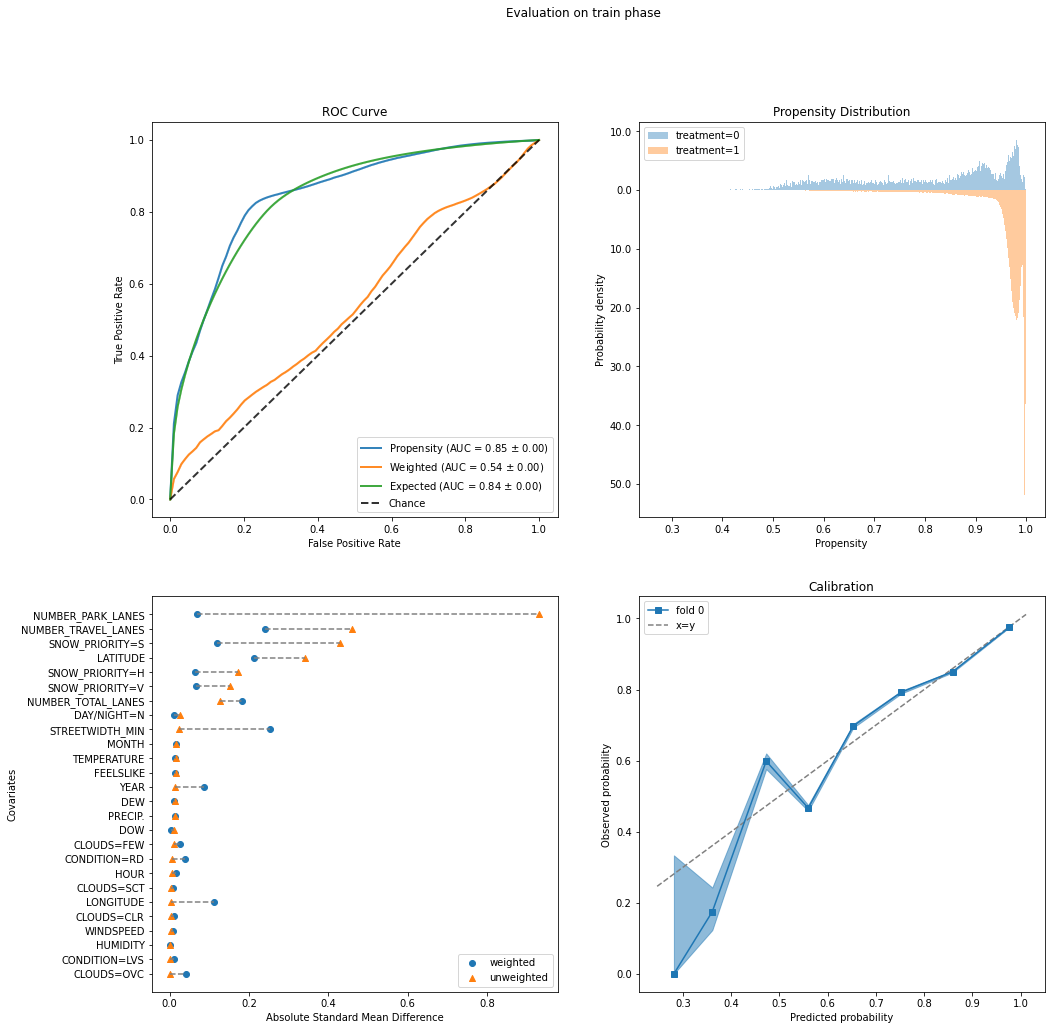

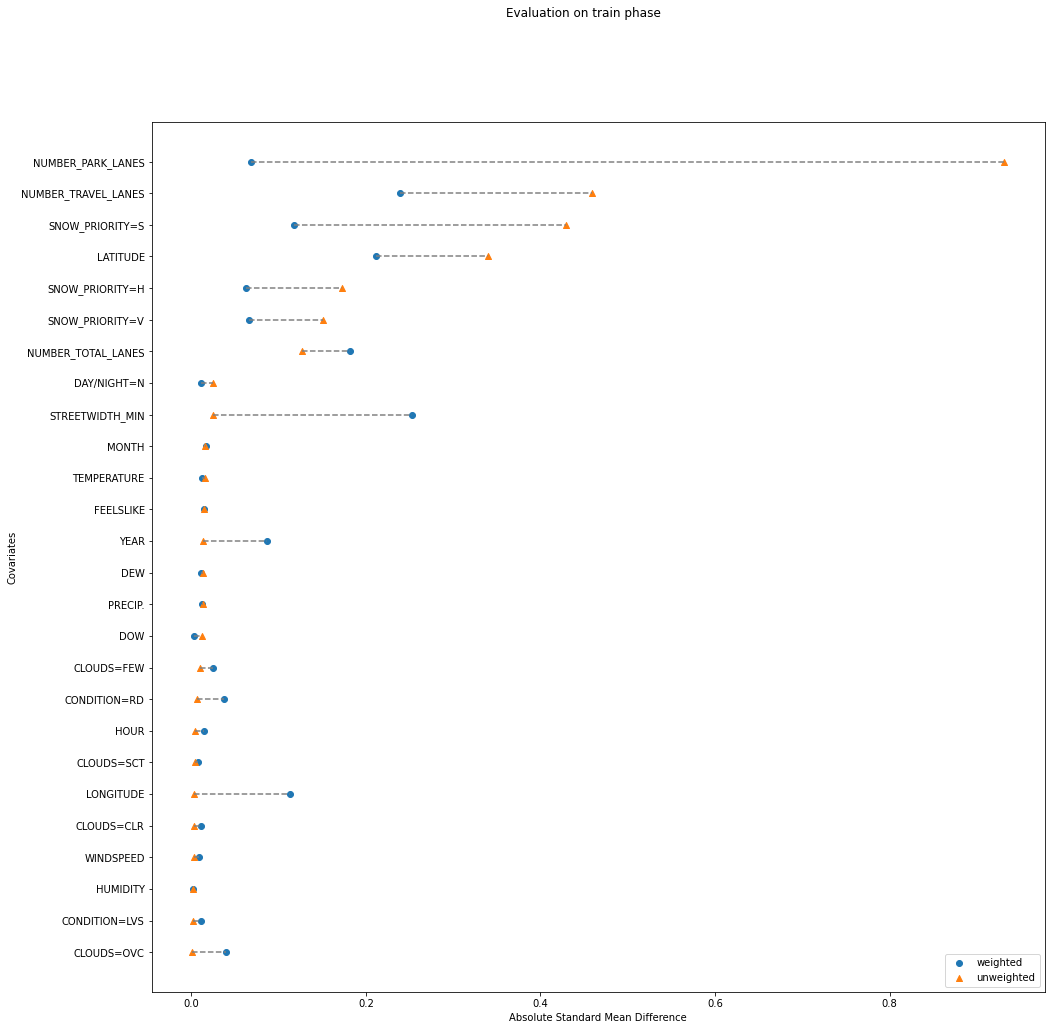

In [38]:
%matplotlib inline
from causallib.evaluation import PropensityEvaluator

evaluator = PropensityEvaluator(ipw)
eval_results = evaluator.evaluate_simple(X, a, y, plots=["roc_curve", "weight_distribution", "covariate_balance_love", "calibration"])
evaluator.evaluate_simple(X, a, y, plots=["covariate_balance_love"])

In [39]:
ipw.estimate_effect(outcomes[1], outcomes[0], effect_types=['diff','ratio'])

diff     0.020380
ratio    1.120909
dtype: float64

We conclude from the IPW analysis that establishing a city wide 25 mph limit results in lower rate of serious traffic accidents, % to %, a difference of % and a relative decrease of %. However, after examining ROC curve, propensity distribution and covariates - we need to balance the t=0 and t=1 classes.

## Fix

In [40]:
df = df[df['Number_Total_Lanes'] != 4]
df = df[df['Number_Park_Lanes'] != 2]

Since almost all streets with 2 parking (and 4 driving) lanes are 25mph streets, we need to exclude them in order to balance the t=0 and t=1 distributions

In [41]:
df['POSTED_SPEED'].value_counts()

1    114687
0     23679
Name: POSTED_SPEED, dtype: int64

In [42]:
df_experiment = df.reset_index(drop=True)

In [43]:
print(df_experiment['SEVERITY'].unique())

le = LabelEncoder()
y = pd.Series(le.fit_transform(df_experiment['SEVERITY']))
y.mean()

[0 1]


0.19269907347180665

In [44]:
print(df['POSTED_SPEED'].unique())
a = pd.Series(le.fit_transform(df_experiment['POSTED_SPEED']))
a.mean()

[0 1]


0.8288669181735397

In [45]:
confounders = ['LATITUDE', 'LONGITUDE', 'HOUR', 'Temperature', 'FeelsLike',
               'Dew', 'Humidity', 'WindSpeed', 'Precip.',
               'Condition', 'Day/Night', 'Clouds', 'StreetWidth_Min',
               'Snow_Priority', 'Number_Travel_Lanes',
               'Number_Park_Lanes', 'Number_Total_Lanes', 'YEAR', 'MONTH', 'DOW'
              ]

In [46]:
X = df_experiment[confounders]

In [47]:
X = pd.get_dummies(X, prefix_sep='=', drop_first=True)
X.head()

LATITUDE  LONGITUDE  HOUR  Temperature  FeelsLike   Dew  Humidity  \
0  40.70983  -74.01468    20           43       35.0  31.0        62   
1  40.70983  -74.01468    18           67       67.0  51.0        57   
2  40.70983  -74.01468    21           74       74.0  56.0        53   
3  40.70983  -74.01468    18           74       74.0  66.0        76   
4  40.70983  -74.01468     8           46       40.0  38.0        73   

   WindSpeed  Precip.  StreetWidth_Min  ...  Condition=LVS  Condition=RD  \
0       17.0      0.0             26.0  ...              0             0   
1       10.0      0.0             26.0  ...              0             0   
2        7.0      0.0             26.0  ...              0             0   
3       13.0      0.0             26.0  ...              0             0   
4       15.0      0.0             26.0  ...              0             0   

   Day/Night=N  Clouds=CLR  Clouds=FEW  Clouds=OVC  Clouds=SCT  \
0            1           0           1           0           0   
1            1           0           0           1           0   
2            1           0           0           0           1   
3            0           0           0           1           0   
4            0           0           0           1           0   

   Snow_Priority=H  Snow_Priority=S  Snow_Priority=V  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0  

[5 rows x 26 columns]

In [48]:
lr = LogisticRegression(solver='lbfgs', max_iter=5000)
ipw = IPW(lr)

In [49]:
ipw.fit(X, a)

IPW(truncate_eps=None, use_stabilized=False,
    learner=LogisticRegression(max_iter=5000))

In [50]:
outcomes = ipw.estimate_population_outcome(X, a, y)
outcomes

0    0.183743
1    0.192942
dtype: float64

/home/djordje/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/djordje/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


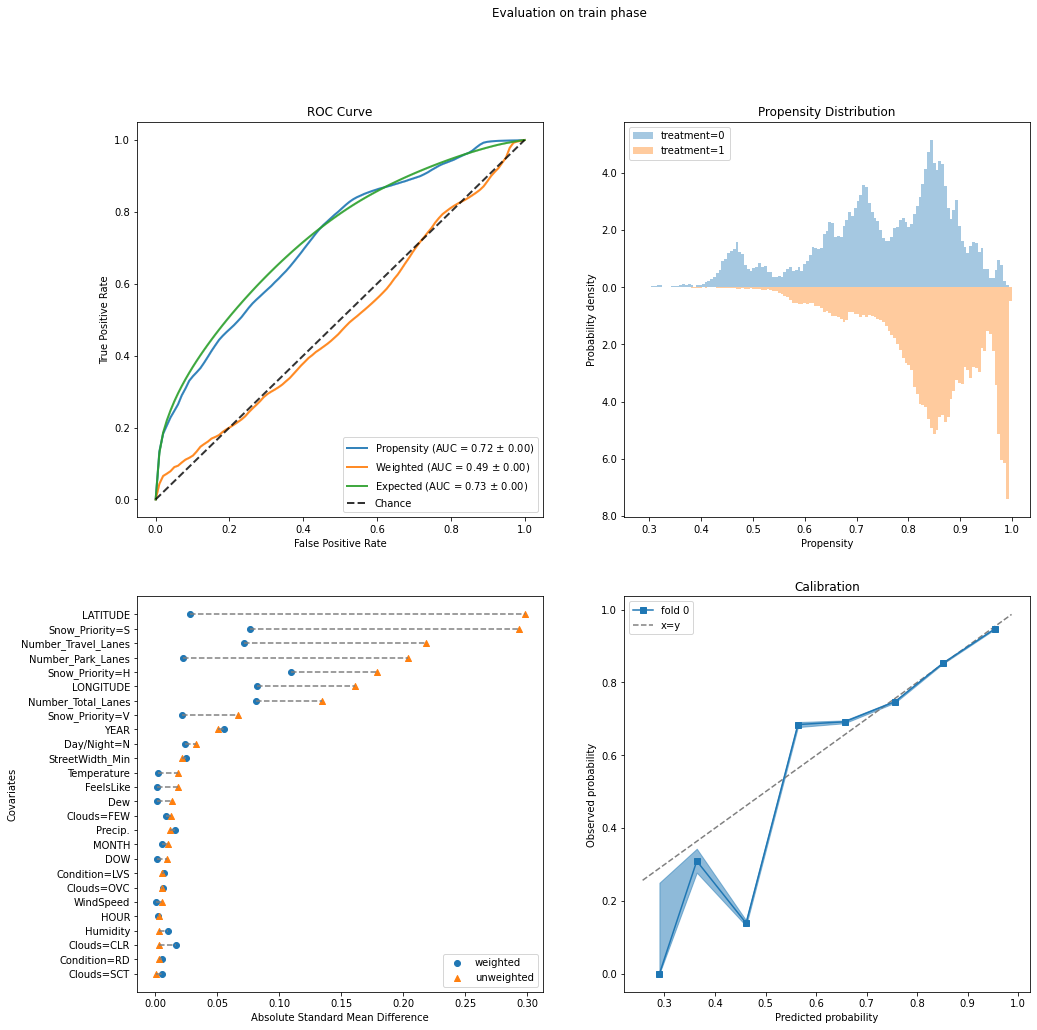

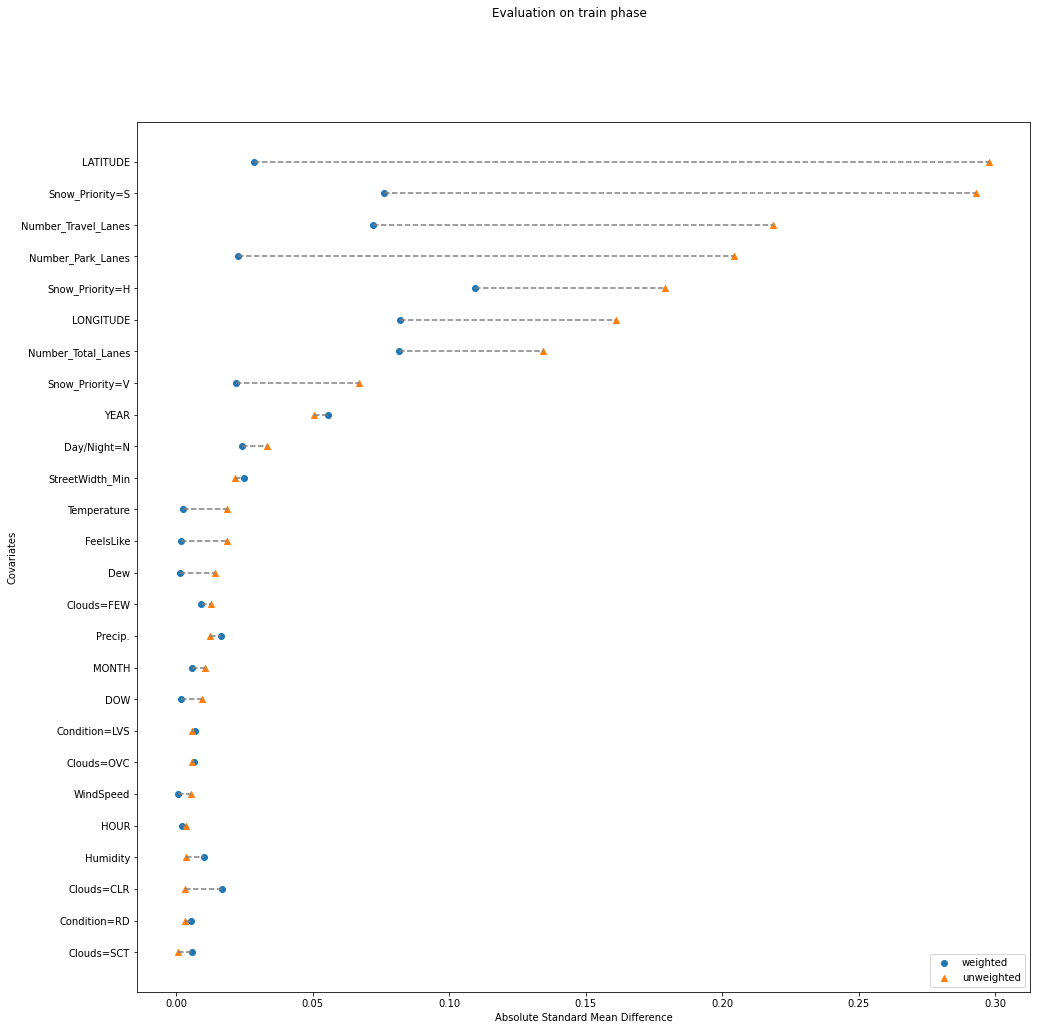

In [51]:
evaluator = PropensityEvaluator(ipw)
eval_results = evaluator.evaluate_simple(X, a, y, plots=["roc_curve", "weight_distribution", "covariate_balance_love", "calibration"])
evaluator.evaluate_simple(X, a, y, plots=["covariate_balance_love"])

In [52]:
ipw.estimate_effect(outcomes[1], outcomes[0], effect_types=['diff','ratio'])

diff     0.009199
ratio    1.050065
dtype: float64

We conclude from the IPW analysis that establishing a city wide 25 mph limit results in lower rate of serious traffic accidents, 19.2% to 18.3%, a difference of 0.9% and a relative decrease of 5%. This equates to around 7500 less injuries or deaths per year. 


|  | deaths per year | hospitalizations per year | ED visits per year |
| --- | --- | --- | --- |
| before intervention | 1,098 | 12,093 | 136,913 |
| intervention defficit - estimate | 55 | 605 | 6,846 |